In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# 1. Data preparation
### 1.1. Exploratory Data Analysis
 

In [2]:
# Dataaset by education level
df_education= pd.read_csv("MWA27.20230614T090606.csv")
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [3]:
# Dataset by nationality
df_nat=pd.read_excel("MWA25.xlsx")
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4
...,...,...,...,...,...,...
299,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0
300,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2
301,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7
302,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8


In [4]:
# Dataset by worked hours
df_hours=pd.read_excel("MWA15.20230614T0906044.xlsx")
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3
...,...,...,...,...,...,...
283,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q3,Thousand,46.8
284,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q4,Thousand,47.3
285,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q1,Thousand,41.3
286,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q2,Thousand,30.8


In [5]:
# Dataset by economic sector
df_sector=pd.read_csv("MWA07.csv")
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [6]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Statistic Label             1296 non-null   object 
 1   NACE Rev 2 Economic Sector  1296 non-null   object 
 2   NMW earnings status         1296 non-null   object 
 3   Quarter                     1296 non-null   object 
 4   UNIT                        1296 non-null   object 
 5   VALUE                       1094 non-null   float64
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


In [7]:
df_sector.describe

<bound method NDFrame.describe of                        Statistic Label NACE Rev 2 Economic Sector  \
0     Employees aged 15 years and over  All NACE economic sectors   
1     Employees aged 15 years and over  All NACE economic sectors   
2     Employees aged 15 years and over  All NACE economic sectors   
3     Employees aged 15 years and over  All NACE economic sectors   
4     Employees aged 15 years and over  All NACE economic sectors   
...                                ...                        ...   
1291  Employees aged 15 years and over                 Not stated   
1292  Employees aged 15 years and over                 Not stated   
1293  Employees aged 15 years and over                 Not stated   
1294  Employees aged 15 years and over                 Not stated   
1295  Employees aged 15 years and over                 Not stated   

                                    NMW earnings status Quarter      UNIT  \
0     Employees reporting earning National Minimum W...  201

In [8]:
# Combined dataset
df=pd.read_excel("Data.xlsx")
df

,Quarter(hours),Usual Hours Worked,VALUE (thousand),NMW earnings status (hours),Quarter(national),Nationality,NMW earnings status (nat),VALUE (thousand).1,Quarter (edu),Education Level,NMW earnings status (edu),VALUE (edu),Year (sector),Broad Nationality Group (sector),Sex (sector),Industry Sector NACE Rev 2,VALUE (sector)
0,2016Q2,Usual hours worked,196.4,Employees reporting earning National Minimum W...,2016Q2,Total Persons,Employees reporting earning National Minimum W...,196.4,2016Q2,All levels of education,Employees reporting earning National Minimum W...,196.4,2005,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",5116.0
1,2016Q3,Usual hours worked,183.1,Employees reporting earning National Minimum W...,2016Q3,Total Persons,Employees reporting earning National Minimum W...,183.1,2016Q3,All levels of education,Employees reporting earning National Minimum W...,183.1,2006,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6032.0
2,2016Q4,Usual hours worked,154.3,Employees reporting earning National Minimum W...,2016Q4,Total Persons,Employees reporting earning National Minimum W...,154.3,2016Q4,All levels of education,Employees reporting earning National Minimum W...,154.3,2007,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6705.0
3,2017Q1,Usual hours worked,140.3,Employees reporting earning National Minimum W...,2017Q1,Total Persons,Employees reporting earning National Minimum W...,140.3,2017Q1,All levels of education,Employees reporting earning National Minimum W...,140.3,2008,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6863.0
4,2017Q2,Usual hours worked,131.7,Employees reporting earning National Minimum W...,2017Q2,Total Persons,Employees reporting earning National Minimum W...,131.7,2017Q2,All levels of education,Employees reporting earning National Minimum W...,131.7,2009,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",6154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,American (US),Female,Employer NACE not known,177.0
6758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,American (US),Female,Employer NACE not known,283.0
6759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,American (US),Female,Employer NACE not known,119.0
6760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,American (US),Female,Employer NACE not known,127.0


In [9]:
df.describe

<bound method NDFrame.describe of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2 

In [10]:
df.info

<bound method DataFrame.info of      Quarter(hours)  Usual Hours Worked  VALUE (thousand)  \
0            2016Q2  Usual hours worked             196.4   
1            2016Q3  Usual hours worked             183.1   
2            2016Q4  Usual hours worked             154.3   
3            2017Q1  Usual hours worked             140.3   
4            2017Q2  Usual hours worked             131.7   
...             ...                 ...               ...   
6757            NaN                 NaN               NaN   
6758            NaN                 NaN               NaN   
6759            NaN                 NaN               NaN   
6760            NaN                 NaN               NaN   
6761            NaN                 NaN               NaN   

                            NMW earnings status (hours) Quarter(national)  \
0     Employees reporting earning National Minimum W...            2016Q2   
1     Employees reporting earning National Minimum W...            2016Q3   
2   

In [11]:
df.shape

(6762, 17)

In [12]:
df.dtypes

Quarter(hours)                       object
Usual Hours Worked                   object
VALUE (thousand)                    float64
NMW earnings status (hours)          object
Quarter(national)                    object
Nationality                          object
NMW earnings status (nat)            object
VALUE (thousand).1                  float64
Quarter (edu)                        object
Education Level                      object
NMW earnings status (edu)            object
VALUE (edu)                         float64
Year (sector)                         int64
Broad Nationality Group (sector)     object
Sex (sector)                         object
Industry Sector NACE Rev 2           object
VALUE (sector)                      float64
dtype: object

In [13]:
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3
...,...,...,...,...,...,...
283,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q3,Thousand,46.8
284,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q4,Thousand,47.3
285,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q1,Thousand,41.3
286,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q2,Thousand,30.8


In [14]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_hours['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_hours["Quarter(hours)"]=dates
# Print the converted dates
print(df_hours["Quarter(hours)"])

0     2016-04-01
1     2016-07-01
2     2016-10-01
3     2017-01-01
4     2017-04-01
         ...    
283   2019-07-01
284   2019-10-01
285   2020-01-01
286   2020-04-01
287   2020-07-01
Name: Quarter(hours), Length: 288, dtype: datetime64[ns]


In [15]:
df_hours

,Statistic Label,NMW earnings status,Usual Hours Worked,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q2,Thousand,16.6,2016-04-01
1,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q3,Thousand,12.2,2016-07-01
2,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2016Q4,Thousand,15.3,2016-10-01
3,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q1,Thousand,13.7,2017-01-01
4,Employees aged 15 years and over,Employees reporting earning National Minimum W...,1-9 hours,2017Q2,Thousand,13.3,2017-04-01
...,...,...,...,...,...,...,...
283,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q3,Thousand,46.8,2019-07-01
284,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2019Q4,Thousand,47.3,2019-10-01
285,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q1,Thousand,41.3,2020-01-01
286,Employees aged 15 years and over,Employees reporting earning more than National...,Variable hours (see note),2020Q2,Thousand,30.8,2020-04-01


# 2. Visualisation

**Stastistical graphics**

**2.1. Usual worked hours**

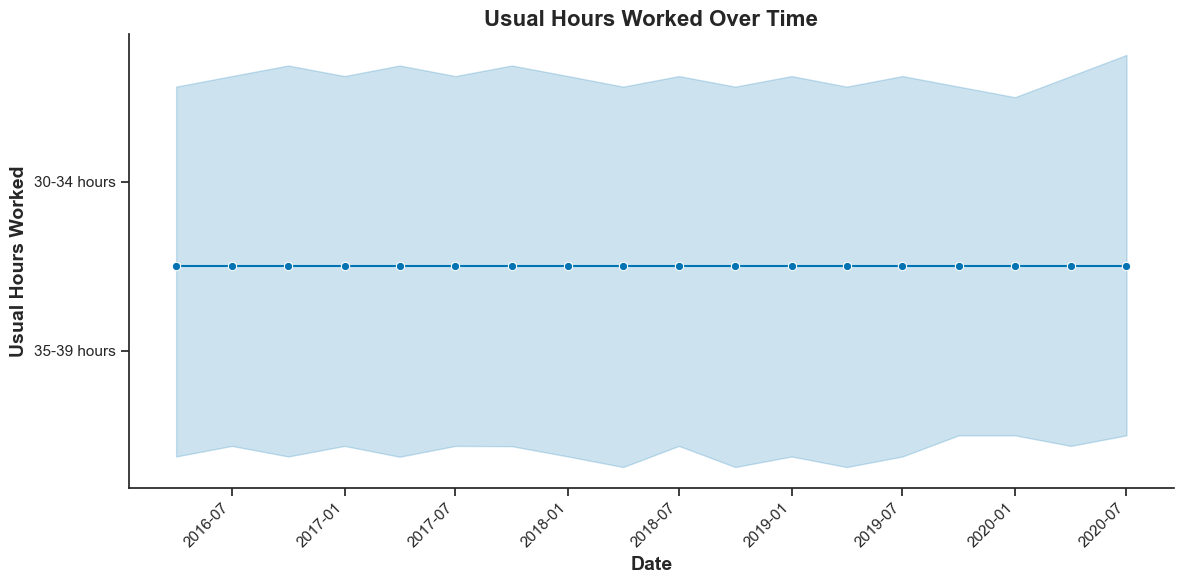

In [16]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o')

# Add labels to graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

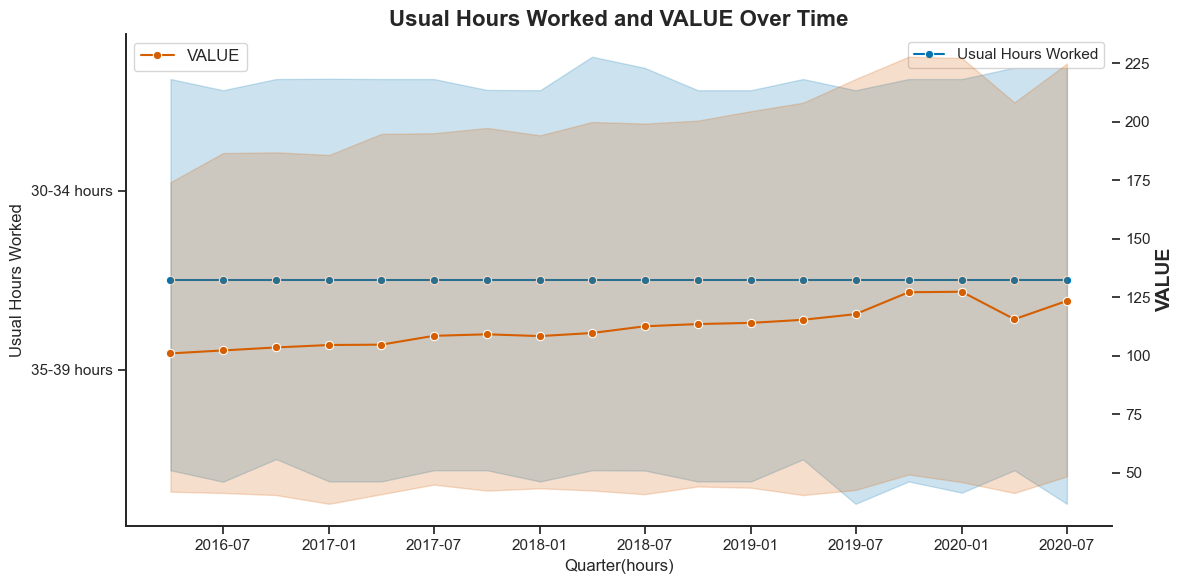

In [17]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Usual Hours Worked
sns.lineplot(data=df_hours, x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o', label='Usual Hours Worked')

# Plot VALUE on secondary y-axis
ax = plt.gca().twinx()
sns.lineplot(data=df_hours, x='Quarter(hours)', y='VALUE', color='r', marker='o', label='VALUE', ax=ax)

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
ax.set_ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked and VALUE Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


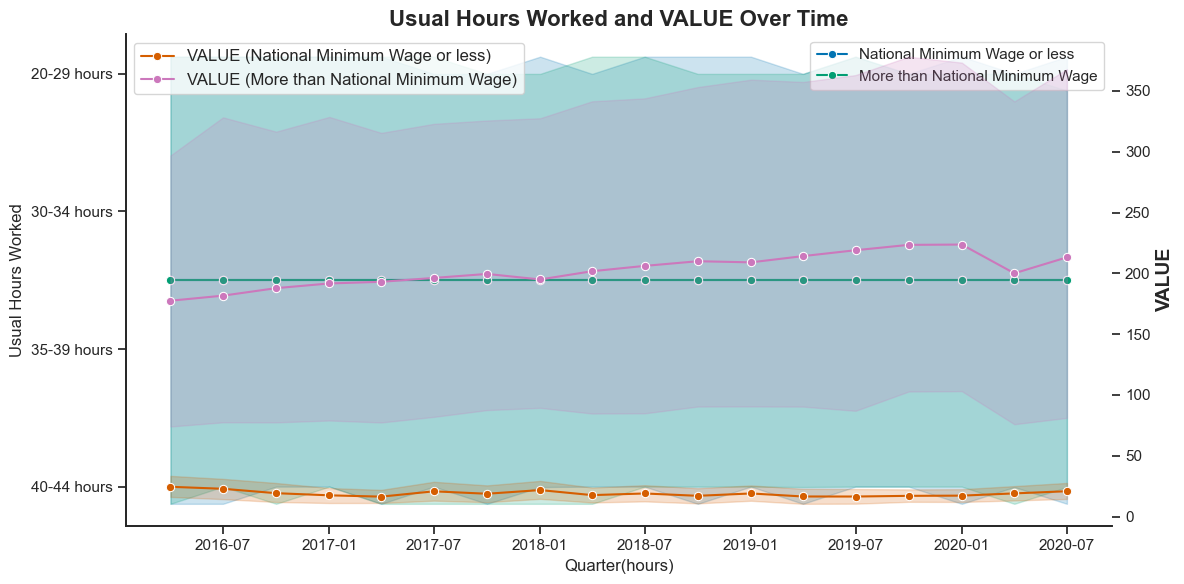

In [18]:
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Usual Hours Worked for "Employees reporting earning National Minimum Wage or less"
sns.lineplot(data=df_hours[df_hours['NMW earnings status'] == 'Employees reporting earning National Minimum Wage or less'],
             x='Quarter(hours)', y='Usual Hours Worked', color='b', marker='o', label='National Minimum Wage or less')

# Plot Usual Hours Worked for "Employees reporting earning more than National Minimum Wage"
sns.lineplot(data=df_hours[df_hours['NMW earnings status'] == 'Employees reporting earning more than National Minimum Wage'],
             x='Quarter(hours)', y='Usual Hours Worked', color='g', marker='o', label='More than National Minimum Wage')

# Plot VALUE on secondary y-axis
ax = plt.gca().twinx()
sns.lineplot(data=df_hours[df_hours['NMW earnings status'] == 'Employees reporting earning National Minimum Wage or less'],
             x='Quarter(hours)', y='VALUE', color='r', marker='o', label='VALUE (National Minimum Wage or less)', ax=ax)
sns.lineplot(data=df_hours[df_hours['NMW earnings status'] == 'Employees reporting earning more than National Minimum Wage'],
             x='Quarter(hours)', y='VALUE', color='m', marker='o', label='VALUE (More than National Minimum Wage)', ax=ax)

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Usual Hours Worked', fontsize=14, fontweight='bold')
ax.set_ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('Usual Hours Worked and VALUE Over Time', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


**2.2. Nationality**

In [19]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_nat['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_nat["Quarter(hours)"]=dates
# Print the converted dates
print(df_nat["Quarter(hours)"])

0     2016-04-01
1     2016-07-01
2     2016-10-01
3     2017-01-01
4     2017-04-01
         ...    
299   2018-10-01
300   2019-01-01
301   2019-04-01
302   2019-07-01
303   2019-10-01
Name: Quarter(hours), Length: 304, dtype: datetime64[ns]


In [20]:
df_nat

,Statistic Label,Nationality,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours)
0,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q2,Thousand,147.3,2016-04-01
1,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q3,Thousand,141.6,2016-07-01
2,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2016Q4,Thousand,116.7,2016-10-01
3,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q1,Thousand,103.3,2017-01-01
4,Employees aged 15 years and over,Irish nationals,Employees reporting earning National Minimum W...,2017Q2,Thousand,100.4,2017-04-01
...,...,...,...,...,...,...,...
299,Employees aged 15 years and over,Other nationals,Total employees,2018Q4,Thousand,118.0,2018-10-01
300,Employees aged 15 years and over,Other nationals,Total employees,2019Q1,Thousand,121.2,2019-01-01
301,Employees aged 15 years and over,Other nationals,Total employees,2019Q2,Thousand,129.7,2019-04-01
302,Employees aged 15 years and over,Other nationals,Total employees,2019Q3,Thousand,132.8,2019-07-01


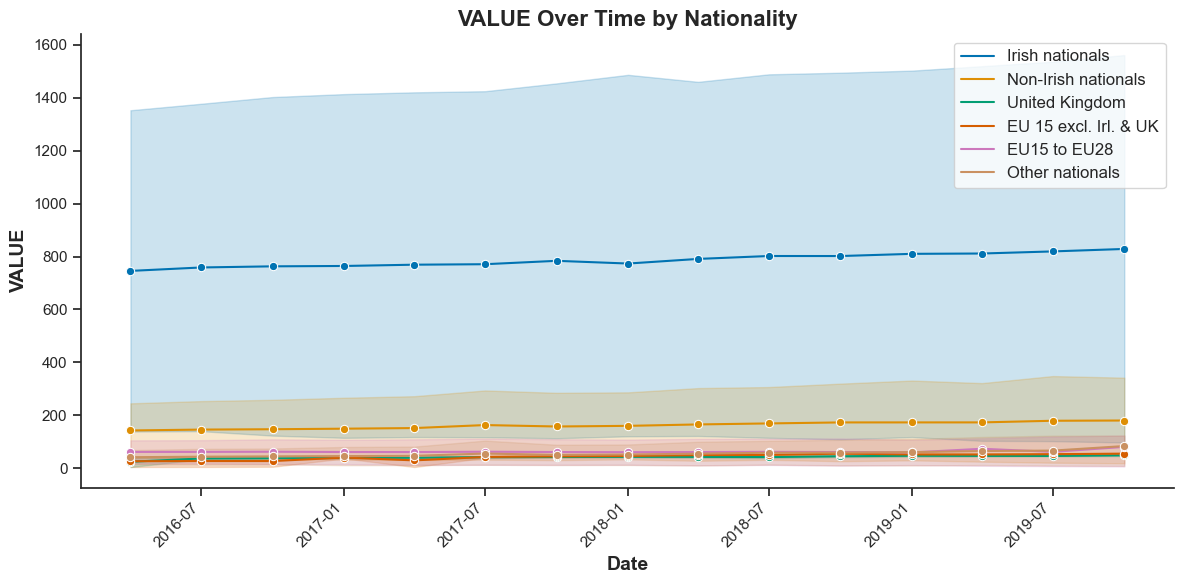

In [21]:
# Setting style for the plot
sns.set(style='ticks', palette='colorblind')

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot VALUE for each nationality
sns.lineplot(data=df_nat, x='Quarter(hours)', y='VALUE', hue='Nationality', marker='o')

# Add labels to your graph
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE Over Time by Nationality', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


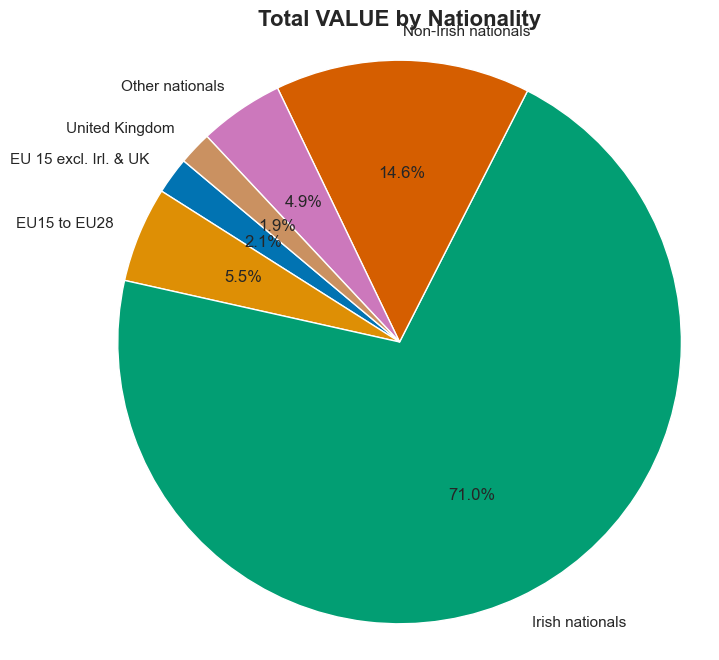

In [22]:
# Group the data by nationality and calculate the total VALUE for each group
nationality_value = df_nat.groupby('Nationality')['VALUE'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(nationality_value['VALUE'], labels=nationality_value['Nationality'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Total VALUE by Nationality', fontsize=16, fontweight='bold')

# Display the pie chart
plt.show()

**2.3. Economic sector**

In [23]:
df_sector

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1291,Employees aged 15 years and over,Not stated,Total employees,2019Q3,Thousand,5.3
1292,Employees aged 15 years and over,Not stated,Total employees,2019Q4,Thousand,5.9
1293,Employees aged 15 years and over,Not stated,Total employees,2020Q1,Thousand,NaN
1294,Employees aged 15 years and over,Not stated,Total employees,2020Q2,Thousand,NaN


In [24]:
# drop all "Not stated values from NACE Rev 2 Economic Sector"
df_sec=df_sector.drop(df_sector[df_sector["NACE Rev 2 Economic Sector"] == "Not stated"].index)

# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_se = df_sec.drop(df_sec[(df_sec["NMW earnings status"] == "Total employees") 
                           | (df_sec["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_sec["NMW earnings status"] == "Not stated")].index)

In [25]:
df_se

,Statistic Label,NACE Rev 2 Economic Sector,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All NACE economic sectors,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
1165,Employees aged 15 years and over,Other NACE activities (R to U),Employees reporting earning National Minimum W...,2019Q3,Thousand,11.4
1166,Employees aged 15 years and over,Other NACE activities (R to U),Employees reporting earning National Minimum W...,2019Q4,Thousand,10.6
1167,Employees aged 15 years and over,Other NACE activities (R to U),Employees reporting earning National Minimum W...,2020Q1,Thousand,8.9
1168,Employees aged 15 years and over,Other NACE activities (R to U),Employees reporting earning National Minimum W...,2020Q2,Thousand,11.0


In [26]:
# Check for missing values in the DataFrame
missing_values = df_se.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label                 0
NACE Rev 2 Economic Sector      0
NMW earnings status             0
Quarter                         0
UNIT                            0
VALUE                         105
dtype: int64


In [27]:
# Drop rows with missing values
df_se = df_se.dropna()

# Check the DataFrame after dropping the rows with missing values
print(df_se)

                       Statistic Label      NACE Rev 2 Economic Sector  \
0     Employees aged 15 years and over       All NACE economic sectors   
1     Employees aged 15 years and over       All NACE economic sectors   
2     Employees aged 15 years and over       All NACE economic sectors   
3     Employees aged 15 years and over       All NACE economic sectors   
4     Employees aged 15 years and over       All NACE economic sectors   
...                                ...                             ...   
1165  Employees aged 15 years and over  Other NACE activities (R to U)   
1166  Employees aged 15 years and over  Other NACE activities (R to U)   
1167  Employees aged 15 years and over  Other NACE activities (R to U)   
1168  Employees aged 15 years and over  Other NACE activities (R to U)   
1169  Employees aged 15 years and over  Other NACE activities (R to U)   

                                    NMW earnings status Quarter      UNIT  \
0     Employees reporting earning 

In [28]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_se['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]

df_se["Quarter(hours)"]=dates

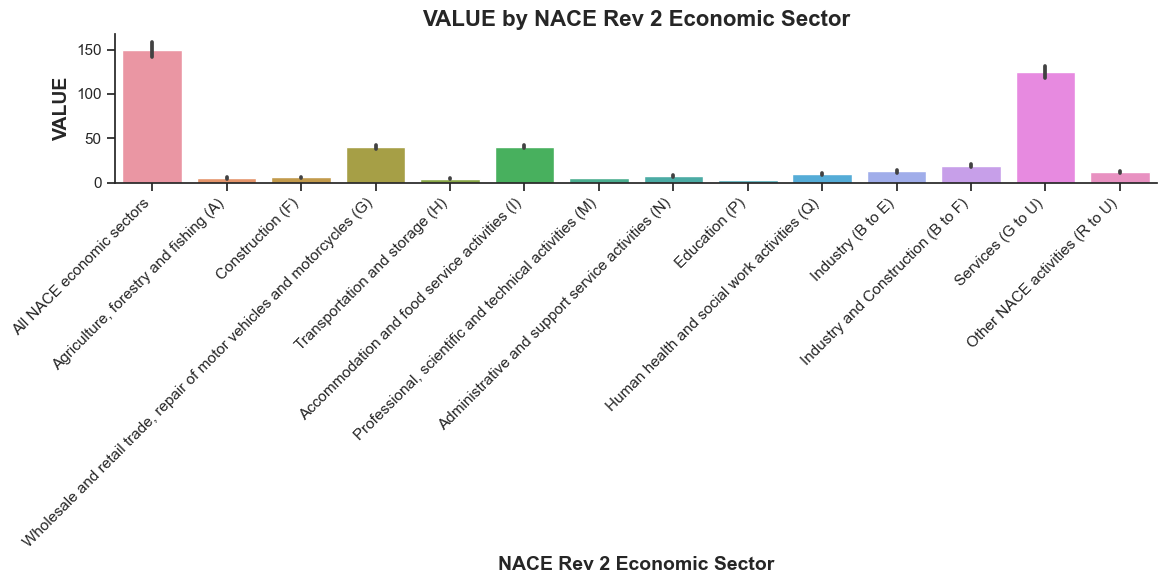

In [29]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_se, x='NACE Rev 2 Economic Sector', y='VALUE')

# Add labels to your graph
plt.xlabel('NACE Rev 2 Economic Sector', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by NACE Rev 2 Economic Sector', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the right and top spines for cleaner appearance
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()


**2.4. Education level**

In [30]:
df_education

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE
0,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q2,Thousand,196.4
1,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q3,Thousand,183.1
2,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2016Q4,Thousand,154.3
3,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q1,Thousand,140.3
4,Employees aged 15 years and over,All levels of education,Employees reporting earning National Minimum W...,2017Q2,Thousand,131.7
...,...,...,...,...,...,...
571,Employees aged 15 years and over,Other/not stated,Total employees,2019Q3,Thousand,58.3
572,Employees aged 15 years and over,Other/not stated,Total employees,2019Q4,Thousand,56.5
573,Employees aged 15 years and over,Other/not stated,Total employees,2020Q1,Thousand,57.0
574,Employees aged 15 years and over,Other/not stated,Total employees,2020Q2,Thousand,38.5


In [31]:
# Drop rows where "NMW earnings status" is "Total employees", "Employees reporting earning more than National Minimum Wage" or "Not Stated"
df_edu = df_education.drop(df_education[(df_education["Education Level"] == "All levels of education") 
                           | (df_education["Education Level"] == "Other/not stated") 
                           | (df_education["NMW earnings status"] == "Employees reporting earning more than National Minimum Wage") 
                           | (df_education["NMW earnings status"] == "Total employees") 
                           | (df_education["NMW earnings status"] == "Not stated")].index)

In [32]:
# Convert to datetime objects
year_quarter_dates = [pd.Period(quarter, freq='Q') for quarter in df_edu['Quarter']]
dates = [qd.to_timestamp() for qd in year_quarter_dates]
df_edu["Quarter(hours)"]=dates

In [37]:
# Check for missing values in the DataFrame
missing_values = df_edu.isnull().sum()
# Display the count of missing values for each column
print(missing_values)

Statistic Label        0
Education Level        0
NMW earnings status    0
Quarter                0
UNIT                   0
VALUE                  0
Quarter(hours)         0
dtype: int64


In [33]:
df_edu

,Statistic Label,Education Level,NMW earnings status,Quarter,UNIT,VALUE,Quarter(hours)
72,Employees aged 15 years and over,Primary or below,Employees reporting earning National Minimum W...,2016Q2,Thousand,8.1,2016-04-01
73,Employees aged 15 years and over,Primary or below,Employees reporting earning National Minimum W...,2016Q3,Thousand,6.5,2016-07-01
74,Employees aged 15 years and over,Primary or below,Employees reporting earning National Minimum W...,2016Q4,Thousand,7.2,2016-10-01
75,Employees aged 15 years and over,Primary or below,Employees reporting earning National Minimum W...,2017Q1,Thousand,5.8,2017-01-01
76,Employees aged 15 years and over,Primary or below,Employees reporting earning National Minimum W...,2017Q2,Thousand,4.8,2017-04-01
...,...,...,...,...,...,...,...
445,Employees aged 15 years and over,Higher secondary,Employees reporting earning National Minimum W...,2019Q3,Thousand,61.3,2019-07-01
446,Employees aged 15 years and over,Higher secondary,Employees reporting earning National Minimum W...,2019Q4,Thousand,59.5,2019-10-01
447,Employees aged 15 years and over,Higher secondary,Employees reporting earning National Minimum W...,2020Q1,Thousand,62.0,2020-01-01
448,Employees aged 15 years and over,Higher secondary,Employees reporting earning National Minimum W...,2020Q2,Thousand,54.3,2020-04-01


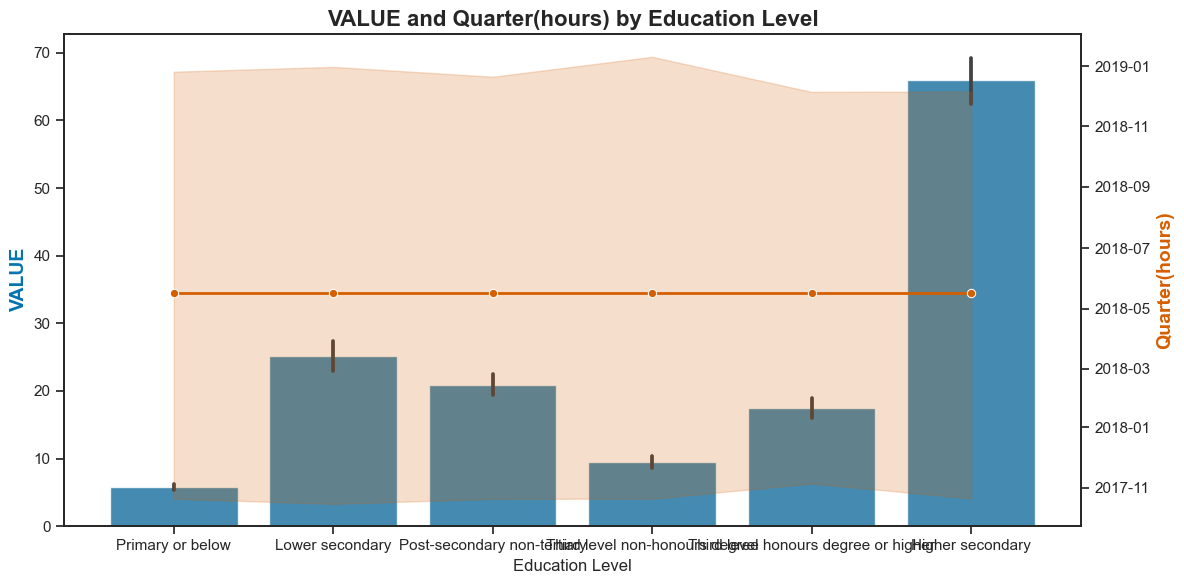

In [34]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot VALUE on the first y-axis (left y-axis)
sns.barplot(data=df_edu, x='Education Level', y='VALUE', ax=ax1, color='b', alpha=0.8)

# Set the label for the first y-axis
ax1.set_ylabel('VALUE', fontsize=14, fontweight='bold', color='b')

# Create the second y-axis (right y-axis) for Quarter(hours)
ax2 = ax1.twinx()

# Plot Quarter(hours) on the second y-axis (right y-axis)
sns.lineplot(data=df_edu, x='Education Level', y='Quarter(hours)', ax=ax2, color='r', marker='o', linewidth=2)

# Set the label for the second y-axis
ax2.set_ylabel('Quarter(hours)', fontsize=14, fontweight='bold', color='r')

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.title('VALUE and Quarter(hours) by Education Level', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


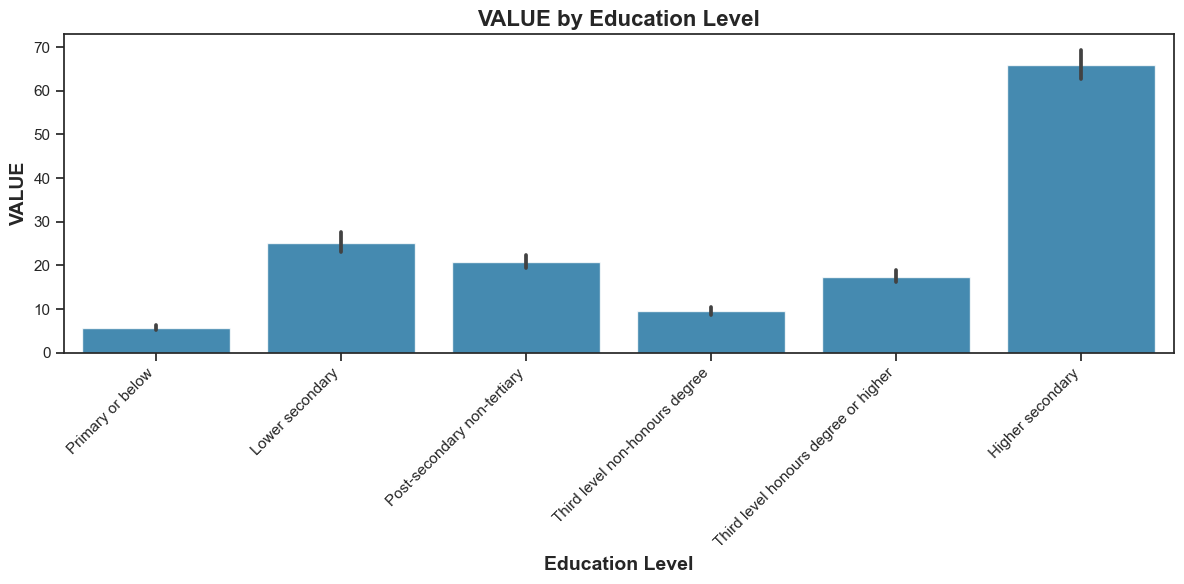

In [36]:
# Create the bar plot for VALUE
plt.figure(figsize=(12, 6))
sns.barplot(data=df_edu, x='Education Level', y='VALUE', color='b', alpha=0.8)

# Add labels to your graph
plt.xlabel('Education Level', fontsize=14, fontweight='bold')
plt.ylabel('VALUE', fontsize=14, fontweight='bold')
plt.title('VALUE by Education Level', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Statistic analyse

# 4. Applying Machine Learning Models